In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

In [2]:
np.random.seed(42)

In [3]:
df=pd.read_csv('df_PCA.csv',delimiter=',')
df.head()

,customer_id,PC0,PC1,PC2,PC3,PC4,PC5,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_no_promotion_used,payment_method_CASH,payment_method_DIGI
0,1b8f824d5e,0.136546,0.000247,0.588527,0.788868,0.054088,0.421970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5d272b9dcb,0.136468,0.000000,0.591727,0.801303,0.036836,0.204790,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,f6d1b2ba63,0.214522,0.021476,0.295363,0.871453,0.354529,0.215721,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,180c632ed8,0.141770,0.006605,0.594165,0.797071,0.174897,0.281806,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4eb37a6705,0.142061,0.006840,0.594022,0.787458,0.085230,0.445947,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [4]:
df.set_index('customer_id',inplace=True)

In [5]:
metric_features=df.columns

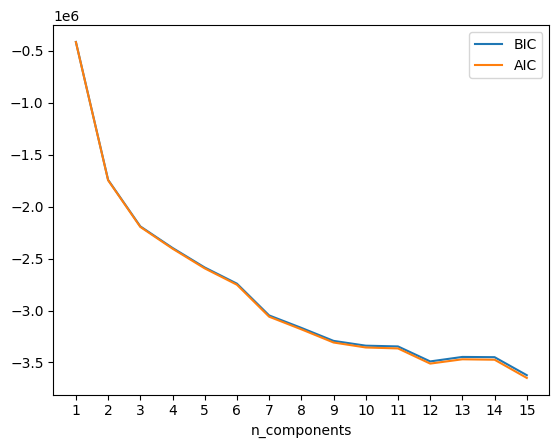

In [8]:
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=42).fit(df[metric_features])
          for n in n_components]

bic_values = [m.bic(df[metric_features]) for m in models]
aic_values = [m.aic(df[metric_features]) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

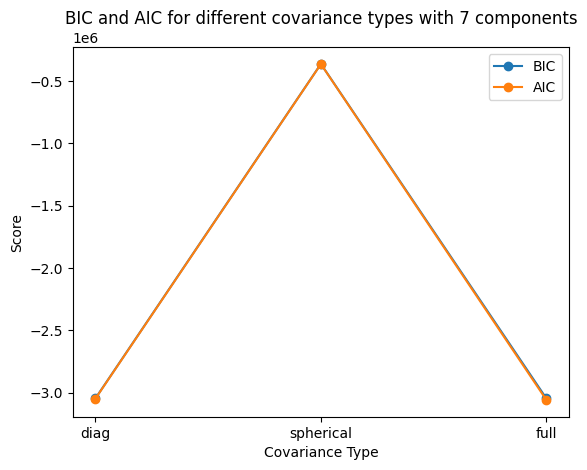

In [11]:
n_components = 7
bic_values = []
aic_values = []
for n in types:
    model = GaussianMixture(n_components=n_components, covariance_type=n, n_init=10, random_state=42)
    model.fit(df[metric_features])
    bic_values.append(model.bic(df[metric_features]))
    aic_values.append(model.aic(df[metric_features]))

plt.plot(types, bic_values, label='BIC', marker='o')
plt.plot(types, aic_values, label='AIC', marker='o')


plt.xlabel('Covariance Type')
plt.ylabel('Score')
plt.title('BIC and AIC for different covariance types with 7 components')
plt.legend(loc='best')
plt.show()

In [12]:
gmm = GaussianMixture(n_components=7, covariance_type='full', n_init=10, init_params='kmeans', random_state=42)
gmm_labels = gmm.fit_predict(df[metric_features])

In [13]:
df_clean=pd.read_csv('df_Clean.csv',delimiter=',')

In [14]:
df_clean.set_index('customer_id',inplace=True)

In [16]:
df_clean_numeric = df_clean.select_dtypes(include=['number'])
df_concat = pd.concat((df_clean_numeric, pd.Series(gmm_labels, name='labels', index=df_clean.index)), axis=1)
df_concat.groupby('labels').mean()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_22,HR_23,Total_Spent,order_count,Diversity_Cuisine,costumer_time,Intensity_of_Activity,Customer_loyalty,product_intensity,Day_Week_Spread
labels,,,,,,,,,,,,,,,,,,,,,
0,27.388566,2.979226,5.075120,3.291009,29.206415,59.957454,1.939428,2.695443,1.831335,0.193954,...,0.068805,0.043377,20.635922,4.006814,1.597094,30.751039,7.316600,0.866183,1.268496,0.674304
1,27.406412,2.443024,3.847920,1.504116,34.500000,59.138432,4.577699,17.270847,4.144887,0.000000,...,0.012782,0.027730,41.716783,2.850520,1.528559,24.638432,7.136977,0.926128,1.374447,0.433998
2,27.604531,3.167868,5.911946,3.218847,27.283213,64.420185,4.005268,4.056493,1.314645,1.130237,...,0.043254,0.032441,31.071169,4.627703,1.814868,37.136972,8.789839,0.822394,1.275198,0.760017
3,27.507689,3.852894,7.178268,4.436868,23.797046,65.875152,2.819931,3.651091,2.514361,0.307952,...,0.080939,0.056860,29.434093,5.510320,1.878554,42.078106,9.239058,0.815206,1.290767,0.961294
4,27.433563,2.442234,4.689110,1.974496,32.914563,62.301454,6.358171,4.738184,0.000000,2.005514,...,0.020913,0.011732,34.404213,3.754654,1.764688,29.386891,6.983065,0.818033,1.247461,0.637908
5,27.516432,3.139565,6.580452,2.704225,25.000427,68.356594,8.213139,6.215137,0.000000,2.514499,...,0.024541,0.014938,46.579159,5.293641,2.185290,43.356167,9.827443,0.735333,1.223891,0.916235
6,27.550113,3.214221,5.530926,2.051693,27.983973,65.930700,5.990865,25.833318,5.238804,0.000000,...,0.030248,0.038149,58.674005,3.979910,1.899719,37.946727,9.857377,0.878799,1.398815,0.621154


In [17]:
cluster_means = df_concat.groupby('labels').mean().T
cluster_means.style.format(precision=2).background_gradient(axis=1)

labels,0,1,2,3,4,5,6
customer_age,27.39,27.41,27.60,27.51,27.43,27.52,27.55
vendor_count,2.98,2.44,3.17,3.85,2.44,3.14,3.21
product_count,5.08,3.85,5.91,7.18,4.69,6.58,5.53
is_chain,3.29,1.50,3.22,4.44,1.97,2.70,2.05
first_order,29.21,34.50,27.28,23.80,32.91,25.00,27.98
last_order,59.96,59.14,64.42,65.88,62.30,68.36,65.93
CUI_American,1.94,4.58,4.01,2.82,6.36,8.21,5.99
CUI_Asian,2.70,17.27,4.06,3.65,4.74,6.22,25.83
CUI_Beverages,1.83,4.14,1.31,2.51,0.00,0.00,5.24
CUI_Cafe,0.19,0.00,1.13,0.31,2.01,2.51,0.00
